In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
churn_data = pd.read_csv('churn_data.csv')
customer_data = pd.read_csv('customer_data.csv')
internet_data = pd.read_csv('internet_data.csv')

Merge the dataframes on customer id.

In [3]:
df_1 = pd.merge(churn_data, customer_data, how='inner', on='customerID')

In [4]:
telecom = pd.merge(df_1, internet_data, how='inner', on='customerID')

In [5]:
telecom.head()

,customerID,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,...,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Female,...,Yes,No,No phone service,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,34,Yes,One year,No,Mailed check,56.95,1889.5,No,Male,...,No,No,No,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Male,...,No,No,No,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Male,...,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Female,...,No,No,No,Fiber optic,No,No,No,No,No,No


In [6]:
telecom.shape

(7043, 21)

In [7]:
telecom.describe()

,tenure,MonthlyCharges,SeniorCitizen
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,0.162147
std,24.559481,30.090047,0.368612
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,0.000000
50%,29.000000,70.350000,0.000000
75%,55.000000,89.850000,0.000000
max,72.000000,118.750000,1.000000


In [8]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(1), int64(2), obj

In [9]:
telecom['TotalCharges'] = pd.to_numeric(telecom['TotalCharges'], errors='coerce')
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
dtypes: float64(2), int64(2), ob

In [10]:
round(telecom.isnull().sum()*100/len(telecom),2)

customerID          0.00
tenure              0.00
PhoneService        0.00
Contract            0.00
PaperlessBilling    0.00
PaymentMethod       0.00
MonthlyCharges      0.00
TotalCharges        0.16
Churn               0.00
gender              0.00
SeniorCitizen       0.00
Partner             0.00
Dependents          0.00
MultipleLines       0.00
InternetService     0.00
OnlineSecurity      0.00
OnlineBackup        0.00
DeviceProtection    0.00
TechSupport         0.00
StreamingTV         0.00
StreamingMovies     0.00
dtype: float64

In [11]:
telecom.dropna(axis=0,inplace=True)

In [12]:
round(telecom.isnull().sum()*100/len(telecom),2)

customerID          0.0
tenure              0.0
PhoneService        0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
dtype: float64

In [13]:
telecom.drop('customerID',axis=1,inplace=True)

In [14]:
"""
Method that converts yes/no columns into 1/0

@author Aryan Singh
"""
def convert_boolean_to_numeric(df):
    cols = df.columns
    num_cols = df._get_numeric_data().columns
    cat_variables = list(set(cols) - set(num_cols))
    for variable in df:
        var = str(variable)
        if(var in cat_variables):
            unique = df[variable].unique()
            unique = [val.lower() for val in unique]
            if((2 == len(unique)) and ('yes' in unique) and ('no' in unique)) :
                df[var] = df[var].str.lower()
                df[var] = df[var].map({ 'yes': 1, 'no': 0})

In [15]:
convert_boolean_to_numeric(telecom)

In [16]:
pd.options.display.max_columns = None
telecom.head()

,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,1,0,Month-to-month,1,Electronic check,29.85,29.85,0,Female,0,1,0,No phone service,DSL,No,Yes,No,No,No,No
1,34,1,One year,0,Mailed check,56.95,1889.50,0,Male,0,0,0,No,DSL,Yes,No,Yes,No,No,No
2,2,1,Month-to-month,1,Mailed check,53.85,108.15,1,Male,0,0,0,No,DSL,Yes,Yes,No,No,No,No
3,45,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,Male,0,0,0,No phone service,DSL,Yes,No,Yes,Yes,No,No
4,2,1,Month-to-month,1,Electronic check,70.70,151.65,1,Female,0,0,0,No,Fiber optic,No,No,No,No,No,No


In [17]:
def convert_categorical_to_numeric(df):
    cols = df.columns
    num_cols = df._get_numeric_data().columns
    cat_variables = list(set(cols) - set(num_cols))
    for variable in df:
        if(str(variable) in cat_variables):
            var_dummy = pd.get_dummies(df[variable], drop_first=True, prefix=str(variable))
            df = pd.concat([df, var_dummy], axis=1)
            df.drop([variable], axis=1, inplace=True)
    return df

In [18]:
telecom = convert_categorical_to_numeric(telecom)

In [19]:
telecom.head()

,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,1,0,1,29.85,29.85,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,34,1,0,56.95,1889.50,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,2,1,1,53.85,108.15,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0
3,45,0,0,42.30,1840.75,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
4,2,1,1,70.70,151.65,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [20]:
telecom.shape

(7032, 31)

In [21]:
def check_outliers(df):
    num_cols = df._get_numeric_data().columns
    num_df = df[list(num_cols)]
    print(num_df.describe(percentiles=[.25,.5,.75,.90,.95,.99]))

In [22]:
check_outliers(telecom)

            tenure  PhoneService  PaperlessBilling  MonthlyCharges  \
count  7032.000000   7032.000000       7032.000000     7032.000000   
mean     32.421786      0.903299          0.592719       64.798208   
std      24.545260      0.295571          0.491363       30.085974   
min       1.000000      0.000000          0.000000       18.250000   
25%       9.000000      1.000000          0.000000       35.587500   
50%      29.000000      1.000000          1.000000       70.350000   
75%      55.000000      1.000000          1.000000       89.862500   
90%      69.000000      1.000000          1.000000      102.645000   
95%      72.000000      1.000000          1.000000      107.422500   
99%      72.000000      1.000000          1.000000      114.734500   
max      72.000000      1.000000          1.000000      118.750000   

       TotalCharges        Churn  SeniorCitizen      Partner   Dependents  \
count   7032.000000  7032.000000    7032.000000  7032.000000  7032.000000   
mean 

In [23]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
tenure                                   7032 non-null int64
PhoneService                             7032 non-null int64
PaperlessBilling                         7032 non-null int64
MonthlyCharges                           7032 non-null float64
TotalCharges                             7032 non-null float64
Churn                                    7032 non-null int64
SeniorCitizen                            7032 non-null int64
Partner                                  7032 non-null int64
Dependents                               7032 non-null int64
Contract_One year                        7032 non-null uint8
Contract_Two year                        7032 non-null uint8
PaymentMethod_Credit card (automatic)    7032 non-null uint8
PaymentMethod_Electronic check           7032 non-null uint8
PaymentMethod_Mailed check               7032 non-null uint8
gender_Male                        

# Feature Standardisation

In [24]:
df = telecom[['tenure','MonthlyCharges','TotalCharges']]

In [25]:
standardised_df = (df-df.mean())/df.std()

In [26]:
telecom.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1,inplace=True)

In [27]:
telecom = pd.concat([telecom,standardised_df], axis=1)

In [28]:
telecom.head()

,PhoneService,PaperlessBilling,Churn,SeniorCitizen,Partner,Dependents,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,gender_Male,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,-1.280157,-1.161611,-0.994123
1,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0.064298,-0.260859,-0.173727
2,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,-1.239416,-0.363897,-0.959581
3,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0.512450,-0.747797,-0.195234
4,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.239416,0.196164,-0.940391


In [29]:
telecom.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
PhoneService                             7032 non-null int64
PaperlessBilling                         7032 non-null int64
Churn                                    7032 non-null int64
SeniorCitizen                            7032 non-null int64
Partner                                  7032 non-null int64
Dependents                               7032 non-null int64
Contract_One year                        7032 non-null uint8
Contract_Two year                        7032 non-null uint8
PaymentMethod_Credit card (automatic)    7032 non-null uint8
PaymentMethod_Electronic check           7032 non-null uint8
PaymentMethod_Mailed check               7032 non-null uint8
gender_Male                              7032 non-null uint8
MultipleLines_No phone service           7032 non-null uint8
MultipleLines_Yes                        7032 non-null uint8
InternetService_Fiber optic            

# Churn Rate

In [30]:
churn = (sum(telecom['Churn'])/len(telecom['Churn'].index))*100

In [31]:
churn

26.578498293515356

In [32]:
#Split into training and test dataset
from sklearn.model_selection import train_test_split

X = telecom.loc[:, telecom.columns != 'Churn']
X_train, X_test, y_train, y_test = train_test_split(X , telecom['Churn'], train_size = 0.7, random_state=100)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [33]:
import statsmodels.api as sm

In [34]:
#Logistic Regression model

logml = sm.GLM(y_train, (sm.add_constant(X_train)), family = sm.families.Binomial())
logml.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4898
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2004.7
Date:                Sat, 23 Jun 2018   Deviance:                       4009.4
Time:                        19:23:42   Pearson chi2:                 6.07e+03
No. Iterations:                    10   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.3056      0.773     -2.984      0.003      -3.820      -0.791
PhoneService                             -0.6775      0.090     -7.495      0.000      -0.855      -0.500
PaperlessBilling                          0.3254      0.090      3.614      0.000       0.149       0.502
SeniorCitizen                             0.3984      0.102      3.924      0.000       0.199       0.597
Partner                                   0.0374      0.094      0.399      0.690      -0.146       0.221
Dependents                               -0.1430      0.107     -1.332      0.183      -0.353       0.067
Contract_One year                        -0.6578      0.129     -5.106      0.000      -0.910      -0.405
Contract_Two year                        -1.2455      0.212     -5.874      0.000      -1.661      -0.830
PaymentMethod_Credit card (automatic)    -0.2577      0.137     -1.883      0.060      -0.526       0.011
PaymentMethod_Electronic check            0.1615      0.113      1.434      0.152      -0.059       0.382
PaymentMethod_Mailed check               -0.2536      0.137     -1.845      0.065      -0.523       0.016
gender_Male                              -0.0346      0.078     -0.442      0.658      -0.188       0.119
MultipleLines_No phone service           -1.6282      0.775     -2.100      0.036      -3.148      -0.108
MultipleLines_Yes                         0.5623      0.214      2.628      0.009       0.143       0.982
InternetService_Fiber optic               2.5124      0.967      2.599      0.009       0.618       4.407
InternetService_No                       -0.3970      0.140     -2.831      0.005      -0.672      -0.122
OnlineSecurity_No internet service       -0.3970      0.140     -2.831      0.005      -0.672      -0.122
OnlineSecurity_Yes                       -0.0245      0.216     -0.113      0.910      -0.448       0.399
OnlineBackup_No internet service         -0.3970      0.140     -2.831      0.005      -0.672      -0.122
OnlineBackup_Yes                          0.1740      0.212      0.822      0.411      -0.241       0.589
DeviceProtection_No internet service     -0.3970      0.140     -2.831      0.005      -0.672      -0.122
DeviceProtection_Yes                      0.3229      0.215      1.501      0.133      -0.099       0.744
TechSupport_No internet service          -0.3970      0.140     -2.831      0.005      -0.672      -0.122
TechSupport_Yes                          -0.0305      0.216     -0.141      0.888      -0.455       0.394
StreamingTV_No internet service          -0.3970      0.140     -2.831      0.005      -0.672      -0.122
StreamingTV_Yes                           0.9598      0.396      2.423      0.015       0.183       1.736
StreamingMovies_No internet service      -0.3970      0.140     -2.831      0.005      -

# Feature Selection Using RFE

In [35]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
from sklearn.feature_selection import RFE

rfe = RFE(logreg, 13)

In [36]:
rfe = rfe.fit(X, telecom['Churn'])

In [37]:
print(rfe.support_)
print(rfe.ranking_)

[ True  True False False False  True  True False  True False False False
 False  True False False  True  True False  True False  True  True False
 False False False  True False  True]
[ 1  1  4 18 10  1  1 13  1 14 16  5  2  1  7 12  1  1  8  1 15  1  1 11
  6  9  3  1 17  1]


In [38]:
col = X_train.columns[rfe.support_]
col = list(col)
col

['PhoneService',
 'PaperlessBilling',
 'Contract_One year',
 'Contract_Two year',
 'PaymentMethod_Electronic check',
 'InternetService_Fiber optic',
 'OnlineSecurity_Yes',
 'OnlineBackup_No internet service',
 'DeviceProtection_No internet service',
 'TechSupport_No internet service',
 'TechSupport_Yes',
 'tenure',
 'TotalCharges']

# Compare Sklearn and Statsmodels

In [39]:
X_train.shape

(4922, 30)

In [40]:
from sklearn.linear_model import LogisticRegression

lregsk = LogisticRegression()
X_train_new = X_train.loc[:,col]
print(X_train_new.shape)
lregsk.fit(X_train_new,y_train)
X_train_new.head()

(4922, 13)


,PhoneService,PaperlessBilling,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,InternetService_Fiber optic,OnlineSecurity_Yes,OnlineBackup_No internet service,DeviceProtection_No internet service,TechSupport_No internet service,TechSupport_Yes,tenure,TotalCharges
879,1,1,0,0,0,0,0,0,0,0,0,0.023557,-0.272679
5790,0,1,0,0,1,0,0,0,0,0,0,0.308744,-0.108855
6498,1,1,0,0,1,1,0,0,0,0,0,-1.280157,-0.970985
880,1,1,0,0,1,1,1,0,0,0,1,-0.913487,-0.547034
2784,1,1,0,0,0,1,0,0,0,0,1,-1.157934,-0.832462


In [41]:
lregsm = sm.GLM(y_train, (sm.add_constant(X_train_new)), family = sm.families.Binomial())
lregsm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2029.6
Date:                Sat, 23 Jun 2018   Deviance:                       4059.1
Time:                        19:23:43   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Covariance Type:             nonrobust
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -1.0902      0.161     -6.777      0.000      -1.406      -0.775
PhoneService                            -0.5260      0.158     -3.337      0.001      -0.835      -0.217
PaperlessBilling                         0.3826      0.089      4.303      0.000       0.208       0.557
Contract_One year                       -0.7051      0.127     -5.573      0.000      -0.953      -0.457
Contract_Two year                       -1.3283      0.211     -6.302      0.000      -1.741      -0.915
PaymentMethod_Electronic check           0.3871      0.082      4.722      0.000       0.226       0.548
InternetService_Fiber optic              0.8265      0.116      7.136      0.000       0.600       1.054
OnlineSecurity_Yes                      -0.4322      0.101     -4.262      0.000      -0.631      -0.233
OnlineBackup_No internet service        -0.3433      0.055     -6.284      0.000      -0.450      -0.236
DeviceProtection_No internet service    -0.3433      0.055     -6.284      0.000      -0.450      -0.236
TechSupport_No internet service         -0.3433      0.055     -6.284      0.000      -0.450      -0.236
TechSupport_Yes                         -0.4165      0.101     -4.139      0.000      -0.614      -0.219
tenure                                  -1.5941      0.179     -8.918      0.000      -1.945      -1.244
TotalCharges                             0.9224      0.177      5.214      0.000       0.576       1.269
========================================================================================================
"""

In [42]:
"""
Calculates VIF for the dependent variables

@Author Aryan Singh
"""

def vif_cal(input_df):
    vif_df = pd.DataFrame(columns = [ 'Var', 'Vif']);
    i=0
    for var in input_df:
        y_vars = input_df[var]
        x_vars = input_df.drop(var, inplace=False, axis=1)
        r2s = sm.OLS(y_vars, x_vars).fit().rsquared
        vif = round(1/(1-r2s),2)
        vif_df.loc[i] = [var,vif]
        i+=1
    return vif_df.sort_values(by = 'Vif', ascending = False, inplace = False)

In [43]:
vif_cal(X_train_new)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


,Var,Vif
7,OnlineBackup_No internet service,inf
8,DeviceProtection_No internet service,inf
9,TechSupport_No internet service,inf
0,PhoneService,7.670000
12,TotalCharges,6.800000
11,tenure,6.410000
1,PaperlessBilling,2.600000
3,Contract_Two year,0.410000
10,TechSupport_Yes,0.260000
5,InternetService_Fiber optic,0.210000


In [44]:
X_train_new.drop('OnlineBackup_No internet service',inplace=True, axis=1)
col.remove('OnlineBackup_No internet service')

In [45]:
vif_cal(X_train_new)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  


,Var,Vif
7,DeviceProtection_No internet service,inf
8,TechSupport_No internet service,inf
0,PhoneService,7.670000
11,TotalCharges,6.800000
10,tenure,6.410000
1,PaperlessBilling,2.600000
3,Contract_Two year,0.410000
9,TechSupport_Yes,0.260000
5,InternetService_Fiber optic,0.210000
6,OnlineSecurity_Yes,0.170000


In [46]:
X_train_new.drop('DeviceProtection_No internet service',inplace=True, axis=1)
col.remove('DeviceProtection_No internet service')

In [47]:
vif_cal(X_train_new)

,Var,Vif
0,PhoneService,7.67
10,TotalCharges,6.80
9,tenure,6.41
1,PaperlessBilling,2.60
3,Contract_Two year,0.41
8,TechSupport_Yes,0.26
5,InternetService_Fiber optic,0.21
6,OnlineSecurity_Yes,0.17
7,TechSupport_No internet service,0.13
4,PaymentMethod_Electronic check,0.10


In [48]:
lregsm = sm.GLM(y_train, (sm.add_constant(X_train_new)), family = sm.families.Binomial())
lregsm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4922
Model:                            GLM   Df Residuals:                     4910
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2029.6
Date:                Sat, 23 Jun 2018   Deviance:                       4059.1
Time:                        19:23:44   Pearson chi2:                 6.46e+03
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.0902      0.161     -6.777      0.000      -1.406      -0.775
PhoneService                       -0.5260      0.158     -3.337      0.001      -0.835      -0.217
PaperlessBilling                    0.3826      0.089      4.303      0.000       0.208       0.557
Contract_One year                  -0.7051      0.127     -5.573      0.000      -0.953      -0.457
Contract_Two year                  -1.3283      0.211     -6.302      0.000      -1.741      -0.915
PaymentMethod_Electronic check      0.3871      0.082      4.722      0.000       0.226       0.548
InternetService_Fiber optic         0.8265      0.116      7.136      0.000       0.600       1.054
OnlineSecurity_Yes                 -0.4322      0.101     -4.262      0.000      -0.631      -0.233
TechSupport_No internet service    -1.0300      0.164     -6.284      0.000      -1.351      -0.709
TechSupport_Yes                    -0.4165      0.101     -4.139      0.000      -0.614      -0.219
tenure                             -1.5941      0.179     -8.918      0.000      -1.945      -1.244
TotalCharges                        0.9224      0.177      5.214      0.000       0.576       1.269
===================================================================================================
"""

In [49]:
# Running Scikit learn model using selected variables
lrsk = LogisticRegression()
lrsk.fit(X_train_new,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

# Making Predictions

In [50]:
X_test_new = X_test.loc[:,col]
y_pred = lrsk.predict_proba(X_test_new)

In [51]:
y_pred_df = pd.DataFrame(y_pred)

In [52]:
y_pred_1 = y_pred_df.iloc[:,[1]]

In [53]:
y_test_df = pd.DataFrame(y_test)

In [54]:
y_test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2110 entries, 942 to 4987
Data columns (total 1 columns):
Churn    2110 non-null int64
dtypes: int64(1)
memory usage: 33.0 KB


In [55]:
y_test_df['CustID'] = y_test_df.index

In [56]:
y_pred_1.reset_index(drop=True,inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [57]:
y_pred_final = pd.concat([y_pred_1,y_test_df], axis=1)

In [58]:
y_pred_final = y_pred_final.rename(columns = { 1: 'Churn_Prob'})

In [59]:
y_pred_final = y_pred_final.reindex_axis(['CustID','Churn','Churn_Prob'], axis = 1)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """Entry point for launching an IPython kernel.


In [60]:
y_pred_final.head()

,CustID,Churn,Churn_Prob
0,942,0,0.506451
1,3730,1,0.365934
2,1761,0,0.004431
3,2283,1,0.674697
4,1872,0,0.006677


In [61]:
y_pred_final['predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x>0.5 else 0)

In [62]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted
0,942,0,0.506451,1
1,3730,1,0.365934,0
2,1761,0,0.004431,0
3,2283,1,0.674697,1
4,1872,0,0.006677,0


# Model Evaluation

In [63]:
from sklearn import metrics

In [64]:
# confusion metrics

confusion = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.predicted )
confusion

array([[1353,  175],
       [ 256,  326]], dtype=int64)

In [65]:
#                 predictNC   predictCh
#actual not churn 1353        175
#actual churn     256         326

In [66]:
accuracy = metrics.accuracy_score(y_pred_final.Churn, y_pred_final.predicted)

In [67]:
accuracy

0.795734597156398

In [68]:
# False Positive 
FP = confusion[0,1]
# False Negative
FN = confusion[1,0]
# True Positive
TP = confusion[1,1]
# True Negative
TN = confusion[0,0]

In [69]:
# Sensitivity = What fractions of actual churns(Yes) predicted correctly
TP / (TP + FN)

0.5601374570446735

In [70]:
#Specificity = What fractions of non-churns(No) predicted correctly
TN / (TN + FP)

0.8854712041884817

In [71]:
# False Positive rate Customer predicted as churned when not churned
# 1 - specificity
fpr = FP / (TN + FP)
fpr

0.11452879581151833

In [72]:
# True positive rate is same as sensitivity

In [73]:
# positive predictive value 
print (TP / float(TP+FP))

0.6506986027944112


In [74]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8408949658172779


## ROC Curve

In [80]:
def draw_roc(actual, prob):
    fpr, tpr, thresholds = metrics.roc_curve(actual, prob, drop_intermediate = False)
    auc_score = metrics.roc_auc_score(actual,prob)
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

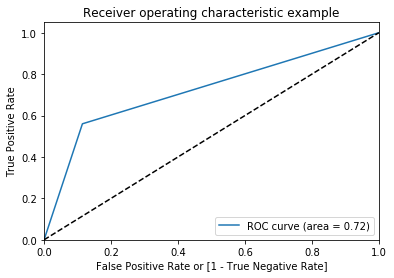

(array([0.       , 0.1145288, 1.       ]),
 array([0.        , 0.56013746, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [81]:
draw_roc(y_pred_final.Churn, y_pred_final.predicted)

## Find optimal cutoff point

In [82]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i] = y_pred_final.Churn_Prob.map(lambda x: 1 if x>i else 0)
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,942,0,0.506451,1,1,1,1,1,1,1,0,0,0,0
1,3730,1,0.365934,0,1,1,1,1,0,0,0,0,0,0
2,1761,0,0.004431,0,1,0,0,0,0,0,0,0,0,0
3,2283,1,0.674697,1,1,1,1,1,1,1,1,0,0,0
4,1872,0,0.006677,0,1,0,0,0,0,0,0,0,0,0


In [84]:
# Now we need to find accuracy sensitivity and selectivity for various probability cut offs
cutoff_df = pd.DataFrame( columns = ['sensitivity', 'selectivity', 'accuracy', 'prob'])
num = [float(x)/10 for x in range(10)]

for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final['Churn'], y_pred_final[i])
    total1 = sum(sum(cm1))
    accuracy = (cm1[0,0] + cm1[1,1])/total1
    sensitivity = cm1[1,1] / (cm1[1,0] + cm1[1,1])
    selectivity = cm1[0,0] / (cm1[0,0] + cm1[0,1])
    cutoff_df.loc[i] = [sensitivity, selectivity, accuracy, i]
print(cutoff_df)

     sensitivity  selectivity  accuracy  prob
0.0     1.000000     0.000000  0.275829   0.0
0.1     0.943299     0.483639  0.610427   0.1
0.2     0.826460     0.644634  0.694787   0.2
0.3     0.750859     0.750000  0.750237   0.3
0.4     0.668385     0.823298  0.780569   0.4
0.5     0.560137     0.885471  0.795735   0.5
0.6     0.391753     0.940445  0.789100   0.6
0.7     0.158076     0.984293  0.756398   0.7
0.8     0.000000     1.000000  0.724171   0.8
0.9     0.000000     1.000000  0.724171   0.9


D:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


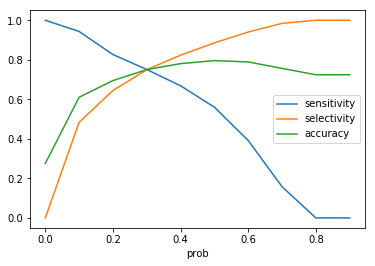

In [85]:
cutoff_df.plot(x = 'prob', y=['sensitivity', 'selectivity', 'accuracy'])

In [86]:
# 0.3 is the optimum cutoff point
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x>0.3 else 0)

In [87]:
y_pred_final.head()

,CustID,Churn,Churn_Prob,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,942,0,0.506451,1,1,1,1,1,1,1,0,0,0,0,1
1,3730,1,0.365934,0,1,1,1,1,0,0,0,0,0,0,1
2,1761,0,0.004431,0,1,0,0,0,0,0,0,0,0,0,0
3,2283,1,0.674697,1,1,1,1,1,1,1,1,0,0,0,1
4,1872,0,0.006677,0,1,0,0,0,0,0,0,0,0,0,0


In [88]:
#Let's check the overall accuracy.
metrics.accuracy_score( y_pred_final.Churn, y_pred_final.final_predicted)

0.7502369668246446

In [89]:
metrics.confusion_matrix( y_pred_final.Churn, y_pred_final.final_predicted )

array([[1146,  382],
       [ 145,  437]], dtype=int64)